In [1]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import myst_nb

#import nbinteract as nbi
### Deb added this because having trouble with the module

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+svg'
pio.templates['book'] = go.layout.Template(
    layout=dict(
        margin=dict(l=10, r=10, t=10, b=10),
        autosize=True,
        width=350, height=250,
    )
)
pio.templates.default = 'seaborn+book'


sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)


def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

# The Constant Model

A transit rider, named Jake, often picks up the northbound C bus at the 3rd \& Pike bus stop in downtown Seattle. The bus is supposed to arrive every 10 minutes, but he notices that is often not the case, and he is intersted in understanding how late is the bus typically. Jake gets hold of the 
scheduled arrival times and actual arrival times for this bus stop for the second quarter of 2016 and
computes the minutes each bus is late. We use Jake's task to introduce the constant model. We want to summarize the data with a constant. To get started, we read in the data.

In [2]:
times = pd.read_csv('data/routeCNtimes.csv')
times

,route,direction,scheduled,actual,minutes_late
0,C,northbound,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.40
1,C,northbound,2016-03-26 01:05:25,2016-03-26 01:10:15,4.83
2,C,northbound,2016-03-26 21:00:25,2016-03-26 21:05:00,4.58
...,...,...,...,...,...
1431,C,northbound,2016-04-10 06:15:28,2016-04-10 06:11:37,-3.85
1432,C,northbound,2016-04-10 17:00:28,2016-04-10 16:56:54,-3.57
1433,C,northbound,2016-04-10 20:15:25,2016-04-10 20:18:21,2.93


Notice the negative late times for the early arrivals. Let's plot a histogram of the minutes each bus is late. 

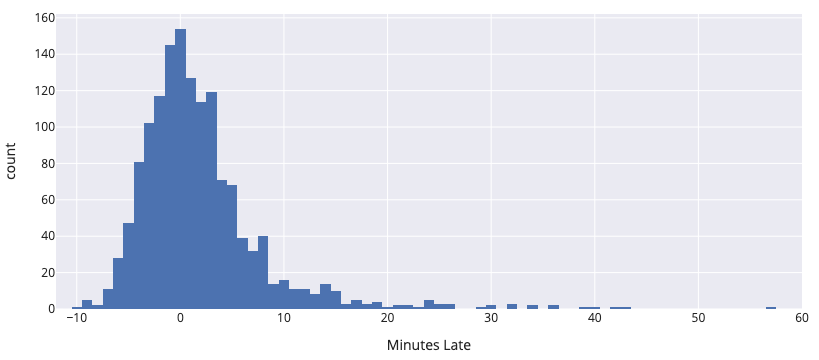

In [3]:
fig = px.histogram(times, x='minutes_late', width=350, height=250)
fig.update_xaxes(range=[-12, 60], title_text='Minutes Late')

There are already some interesting patterns in the data. For example, many buses arrive earlier than scheduled and some are well over 20 minutes late. We also see a clear mode (high point) at $0$, meaning many buses arrive roughly on time.

We are interested in understanding how late the buses are typically. More specifically, we would like to summarize the buses' lateness by a single number, a constant so to speak. You are probably familiar with three summary statistics that might be useful summaries--the mean, median, and mode--and you might even advocate for the median due to the skewness in the histogram. Based on the histogram above, we would estimate the mode to be 0, and we can compute the mean and median of 'minutes_late':

In [4]:
"avg:{0:.2f},   median:{1:.2f}".format(times['minutes_late'].mean(), times['minutes_late'].median())

'avg:1.92,   median:0.74'

Rather than make a case for one summary over another, we take a more formal approach that uses a loss function to find the best single summary of the data.
Essentially, we are making a model for bus lateness that consists of a constant.
Let's call this constant $\theta $. 

We're pretty sure that a constant, like $ \theta = 5$, makes less sense than, say, $\theta = 0 $ because when we look at the values in our data, we can see that more points fall close to $0$ than they do to $5$.
However, it's not as clear that $\theta = 0$ is a better choice than $\theta = 0.74 $, the median, or $ \theta = 1.92 $, the mean, or something in between. To make precise choices between different values of $ \theta $, we would like to assign each value of $\theta$ a number that measures how "good" the fit is to our data. That is, we want a function that takes as input a value of $ \theta $ and the points in our dataset, and outputs a single number that we can use to select the best $ \theta $ that we can.
We call this function a *loss function*. In the next section, we examine how to define and use loss functions to fit the constant model.